# CA2 Clustering resign
By : Joel Poah  
Class :  DAAA/FT/2A/02  
admin no : P2112729

## How to achieve employee segmentation using unsupervised machine learning algorithm in Python?
Describe the characteristics of each employee cluster.  

Which group of employee is the most vulnerable that the management should do something to retain them.  

Goal is to cluster those employees that will resign 

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
cluster = pd.read_csv('Company_Employee.csv')
cluster

,Age,Gender,BusinessTravel,Job Function,Distance Between Company and Home (KM),"Education (1 is lowest, 5 is highest)","Job Satisfaction (1 is lowest, 4 is highest)",MaritalStatus,Salary ($),"Performance Rating (1 is lowest, 4 is highest)","Work Life Balance (1 is worst, 4 is best)",Length of Service (Years),Resign Status
0,41,Female,Travel_Rarely,Sales,1,2,4,Single,5993,3,1,6,Yes
1,49,Male,Travel_Frequently,Research & Development,8,1,2,Married,5130,4,3,10,No
2,37,Male,Travel_Rarely,Research & Development,2,2,3,Single,2090,3,3,0,Yes
3,33,Female,Travel_Frequently,Research & Development,3,4,3,Married,2909,3,3,8,No
4,27,Male,Travel_Rarely,Research & Development,2,1,2,Married,3468,3,3,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Male,Travel_Frequently,Research & Development,23,2,4,Married,2571,3,3,5,No
1466,39,Male,Travel_Rarely,Research & Development,6,1,1,Married,9991,3,3,7,No
1467,27,Male,Travel_Rarely,Research & Development,4,3,2,Married,6142,4,3,6,No
1468,49,Male,Travel_Frequently,Sales,2,3,2,Married,5390,3,2,9,No


In [55]:
cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Age                                             1470 non-null   int64 
 1   Gender                                          1470 non-null   object
 2   BusinessTravel                                  1470 non-null   object
 3   Job Function                                    1470 non-null   object
 4   Distance Between Company and Home (KM)          1470 non-null   int64 
 5   Education (1 is lowest, 5 is highest)           1470 non-null   int64 
 6   Job Satisfaction (1 is lowest, 4 is highest)    1470 non-null   int64 
 7   MaritalStatus                                   1470 non-null   object
 8   Salary ($)                                      1470 non-null   int64 
 9   Performance Rating (1 is lowest, 4 is highest)  1470

In [56]:
cluster.isna().any()

Age                                               False
Gender                                            False
BusinessTravel                                    False
Job Function                                      False
Distance Between Company and Home (KM)            False
Education (1 is lowest, 5 is highest)             False
Job Satisfaction (1 is lowest, 4 is highest)      False
MaritalStatus                                     False
Salary ($)                                        False
Performance Rating (1 is lowest, 4 is highest)    False
Work Life Balance (1 is worst, 4 is best)         False
Length of Service (Years)                         False
Resign Status                                     False
dtype: bool

# EDA process and finding out more of data

## Fortunately there is no null values

In [57]:
#importing all modules used 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from statsmodels.formula.api import ols
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier as KNN
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


## I will split the dataframe to numeric and categorical so that it will be easier to preprocess the columns

In [58]:
# get columns 0 2,4,5,6,8,9,10,11
num0 = cluster.iloc[:,0]
num1 = cluster.iloc[:,2]
num2 = cluster.iloc[:,4:7]
num3= cluster.iloc[:,8:12]
num =pd.concat([num0,num1,num2,num3],axis=1)

# I will be ordinal encoding business Travel since i can make it can be in a scale of how frequent people travel.



In [59]:
# label encode BusinessTravel
num.loc[num['BusinessTravel']=='Non-Travel', 'BusinessTravel'] = 0
num.loc[num['BusinessTravel']=='Travel_Rarely', 'BusinessTravel'] = 1
num.loc[num['BusinessTravel']=='Travel_Frequently', 'BusinessTravel'] = 2
num.BusinessTravel.unique()

array([1, 2, 0], dtype=object)

In [60]:
cat = cluster.iloc [:,1:2]
cat1 = cluster.iloc [:,3]
cat2= cluster.iloc [:,7]
cat3= cluster.iloc[:,12]
cat=pd.concat([cat,cat1,cat2,cat3],axis=1)
cat


,Gender,Job Function,MaritalStatus,Resign Status
0,Female,Sales,Single,Yes
1,Male,Research & Development,Married,No
2,Male,Research & Development,Single,Yes
3,Female,Research & Development,Married,No
4,Male,Research & Development,Married,No
...,...,...,...,...
1465,Male,Research & Development,Married,No
1466,Male,Research & Development,Married,No
1467,Male,Research & Development,Married,No
1468,Male,Sales,Married,No


In [61]:
print("Gender :",cat.Gender.unique())
print("Department:",cat['Job Function'].unique())
print("Marital Status:",cat.MaritalStatus.unique())
print("Resign Status:",cat['Resign Status'].unique())
dummy = pd.get_dummies(cat)
dummy.drop('Resign Status_No',axis=1,inplace=True)

Gender : ['Female' 'Male']
Department: ['Sales' 'Research & Development' 'Human Resources']
Marital Status: ['Single' 'Married' 'Divorced']
Resign Status: ['Yes' 'No']


## Scaling is crucial for clustering models as clusters are formed based on distance. There would not be bias after standardizing the continuous variables and fitting it to the model later. I tested the silhouette coefficient score on the data with dummy variables but unscaled data and managed to get a rather high score but this is not accurate as the data is not scaled. Which means the model is probably bias and thus have clear clusters.

In [62]:
raw = pd.concat([num,dummy],axis=1)
# Clustering silhouette_score
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
# trying different number of clusters
for k in range(2, 11):
    model = KMeans(n_clusters=k).fit(raw)
    label = model.labels_
    sil_coeff = silhouette_score(raw, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {:.3f}".format(k,
    sil_coeff))


For n_clusters=2, The Silhouette Coefficient is 0.708
For n_clusters=3, The Silhouette Coefficient is 0.623
For n_clusters=4, The Silhouette Coefficient is 0.610
For n_clusters=5, The Silhouette Coefficient is 0.615
For n_clusters=6, The Silhouette Coefficient is 0.617
For n_clusters=7, The Silhouette Coefficient is 0.617
For n_clusters=8, The Silhouette Coefficient is 0.604
For n_clusters=9, The Silhouette Coefficient is 0.597
For n_clusters=10, The Silhouette Coefficient is 0.563


In [63]:
#scaling the numerical data
#scale the 0th 1st and 4th column with standard scaler
scaler = StandardScaler()
# columns_to_scale1,columns_to_scale2,columns_to_scale3 = num.iloc[:,0:5],num.iloc[:,4],num.iloc[:,7]
# columns_to_scale = pd.concat([columns_to_scale1,columns_to_scale2,columns_to_scale3],axis=1)
# columns_to_scale = scaler.fit_transform(columns_to_scale)
# columns_to_scale = pd.DataFrame(columns_to_scale,columns=['Age','Distance_Company_Home_KM','Salary','Length_of_Service_Years','Work Life Balance (1 is worst, 4 is best)','Performance Rating (1 is lowest, 4 is highest)','Job Satisfaction (1 is lowest, 4 is highest)','Education (1 is lowest, 5 is highest)'])
# num_scaled=num.drop(['Age','Distance Between Company and Home (KM)','Salary ($)','Length of Service (Years)'],axis=1)
num_scaled=scaler.fit_transform(num)
num_scaled = pd.DataFrame(num_scaled,columns=['Age','BusinessTravel','DistanceCompanyHome','Education','JobSatis','Salary','PerformRating','WorkLifeBalance','LengthofService'])
# add columns_to_scale to num_scaled dataframe
# num_scaled = pd.concat([num_scaled,columns_to_scale],axis=1)
num_scaled.rename(columns={"Education (1 is lowest, 5 is highest)": "Education","Job Satisfaction (1 is lowest, 4 is highest)":"Job_Satis","Performance Rating (1 is lowest, 4 is highest)":"PerformRating","Work Life Balance (1 is worst, 4 is best)":"WorkLifeBalance"},inplace=True)
num_scaled


,Age,BusinessTravel,DistanceCompanyHome,Education,JobSatis,Salary,PerformRating,WorkLifeBalance,LengthofService
0,0.446350,-0.162399,-1.010909,-0.891688,1.153254,-0.108350,-0.426230,-2.493820,-0.164613
1,1.322365,1.717339,-0.147150,-1.868426,-0.660853,-0.291719,2.346151,0.338096,0.488508
2,0.008343,-0.162399,-0.887515,-0.891688,0.246200,-0.937654,-0.426230,0.338096,-1.144294
3,-0.429664,1.717339,-0.764121,1.061787,0.246200,-0.763634,-0.426230,0.338096,0.161947
4,-1.086676,-0.162399,-0.887515,-1.868426,-0.660853,-0.644858,-0.426230,0.338096,-0.817734
...,...,...,...,...,...,...,...,...,...
1465,-0.101159,1.717339,1.703764,-0.891688,1.153254,-0.835451,-0.426230,0.338096,-0.327893
1466,0.227347,-0.162399,-0.393938,-1.868426,-1.567907,0.741140,-0.426230,0.338096,-0.001333
1467,-1.086676,-0.162399,-0.640727,0.085049,-0.660853,-0.076690,2.346151,0.338096,-0.164613
1468,1.322365,1.717339,-0.887515,0.085049,-0.660853,-0.236474,-0.426230,-1.077862,0.325228


## correlation plot shows that there is little to no correlation between the attributes


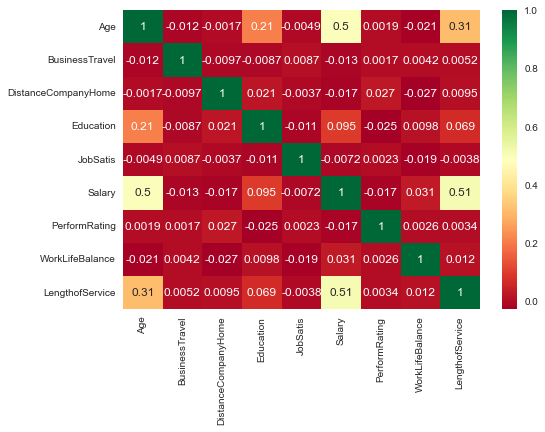

In [64]:
corr=num_scaled.corr()
sns.heatmap(corr,annot=True,cmap='RdYlGn')
plt.show()

## Based On Dendrogram there are 3 huge clusters out of the whole numerical dataframe

## Dimensionality curse , there are too many dimensions in this dataset and would need to be reduced or else model will be overfitted clusters will become less obvious as everything seems to be very close together
### Chi Square test to find independence on categorical data.  
One hot encode will be used for Business Travel,Department,Marital Status 
0 and 1 will be used for Resign Status and Gender

In [65]:
# rename num
num.rename(columns={"Education (1 is lowest, 5 is highest)": "Education","Job Satisfaction (1 is lowest, 4 is highest)":"Job_Satis","Performance Rating (1 is lowest, 4 is highest)":"PerformRating","Work Life Balance (1 is worst, 4 is best)":"WorkLifeBalance"},inplace=True)
df_noscale = pd.concat([num[['Education','Job_Satis','PerformRating','WorkLifeBalance']],dummy],axis=1)
df_noscale

,Education,Job_Satis,PerformRating,WorkLifeBalance,Gender_Female,Gender_Male,Job Function_Human Resources,Job Function_Research & Development,Job Function_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Resign Status_Yes
0,2,4,3,1,1,0,0,0,1,0,0,1,1
1,1,2,4,3,0,1,0,1,0,0,1,0,0
2,2,3,3,3,0,1,0,1,0,0,0,1,1
3,4,3,3,3,1,0,0,1,0,0,1,0,0
4,1,2,3,3,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2,4,3,3,0,1,0,1,0,0,1,0,0
1466,1,1,3,3,0,1,0,1,0,0,1,0,0
1467,3,2,4,3,0,1,0,1,0,0,1,0,0
1468,3,2,3,2,0,1,0,0,1,0,1,0,0


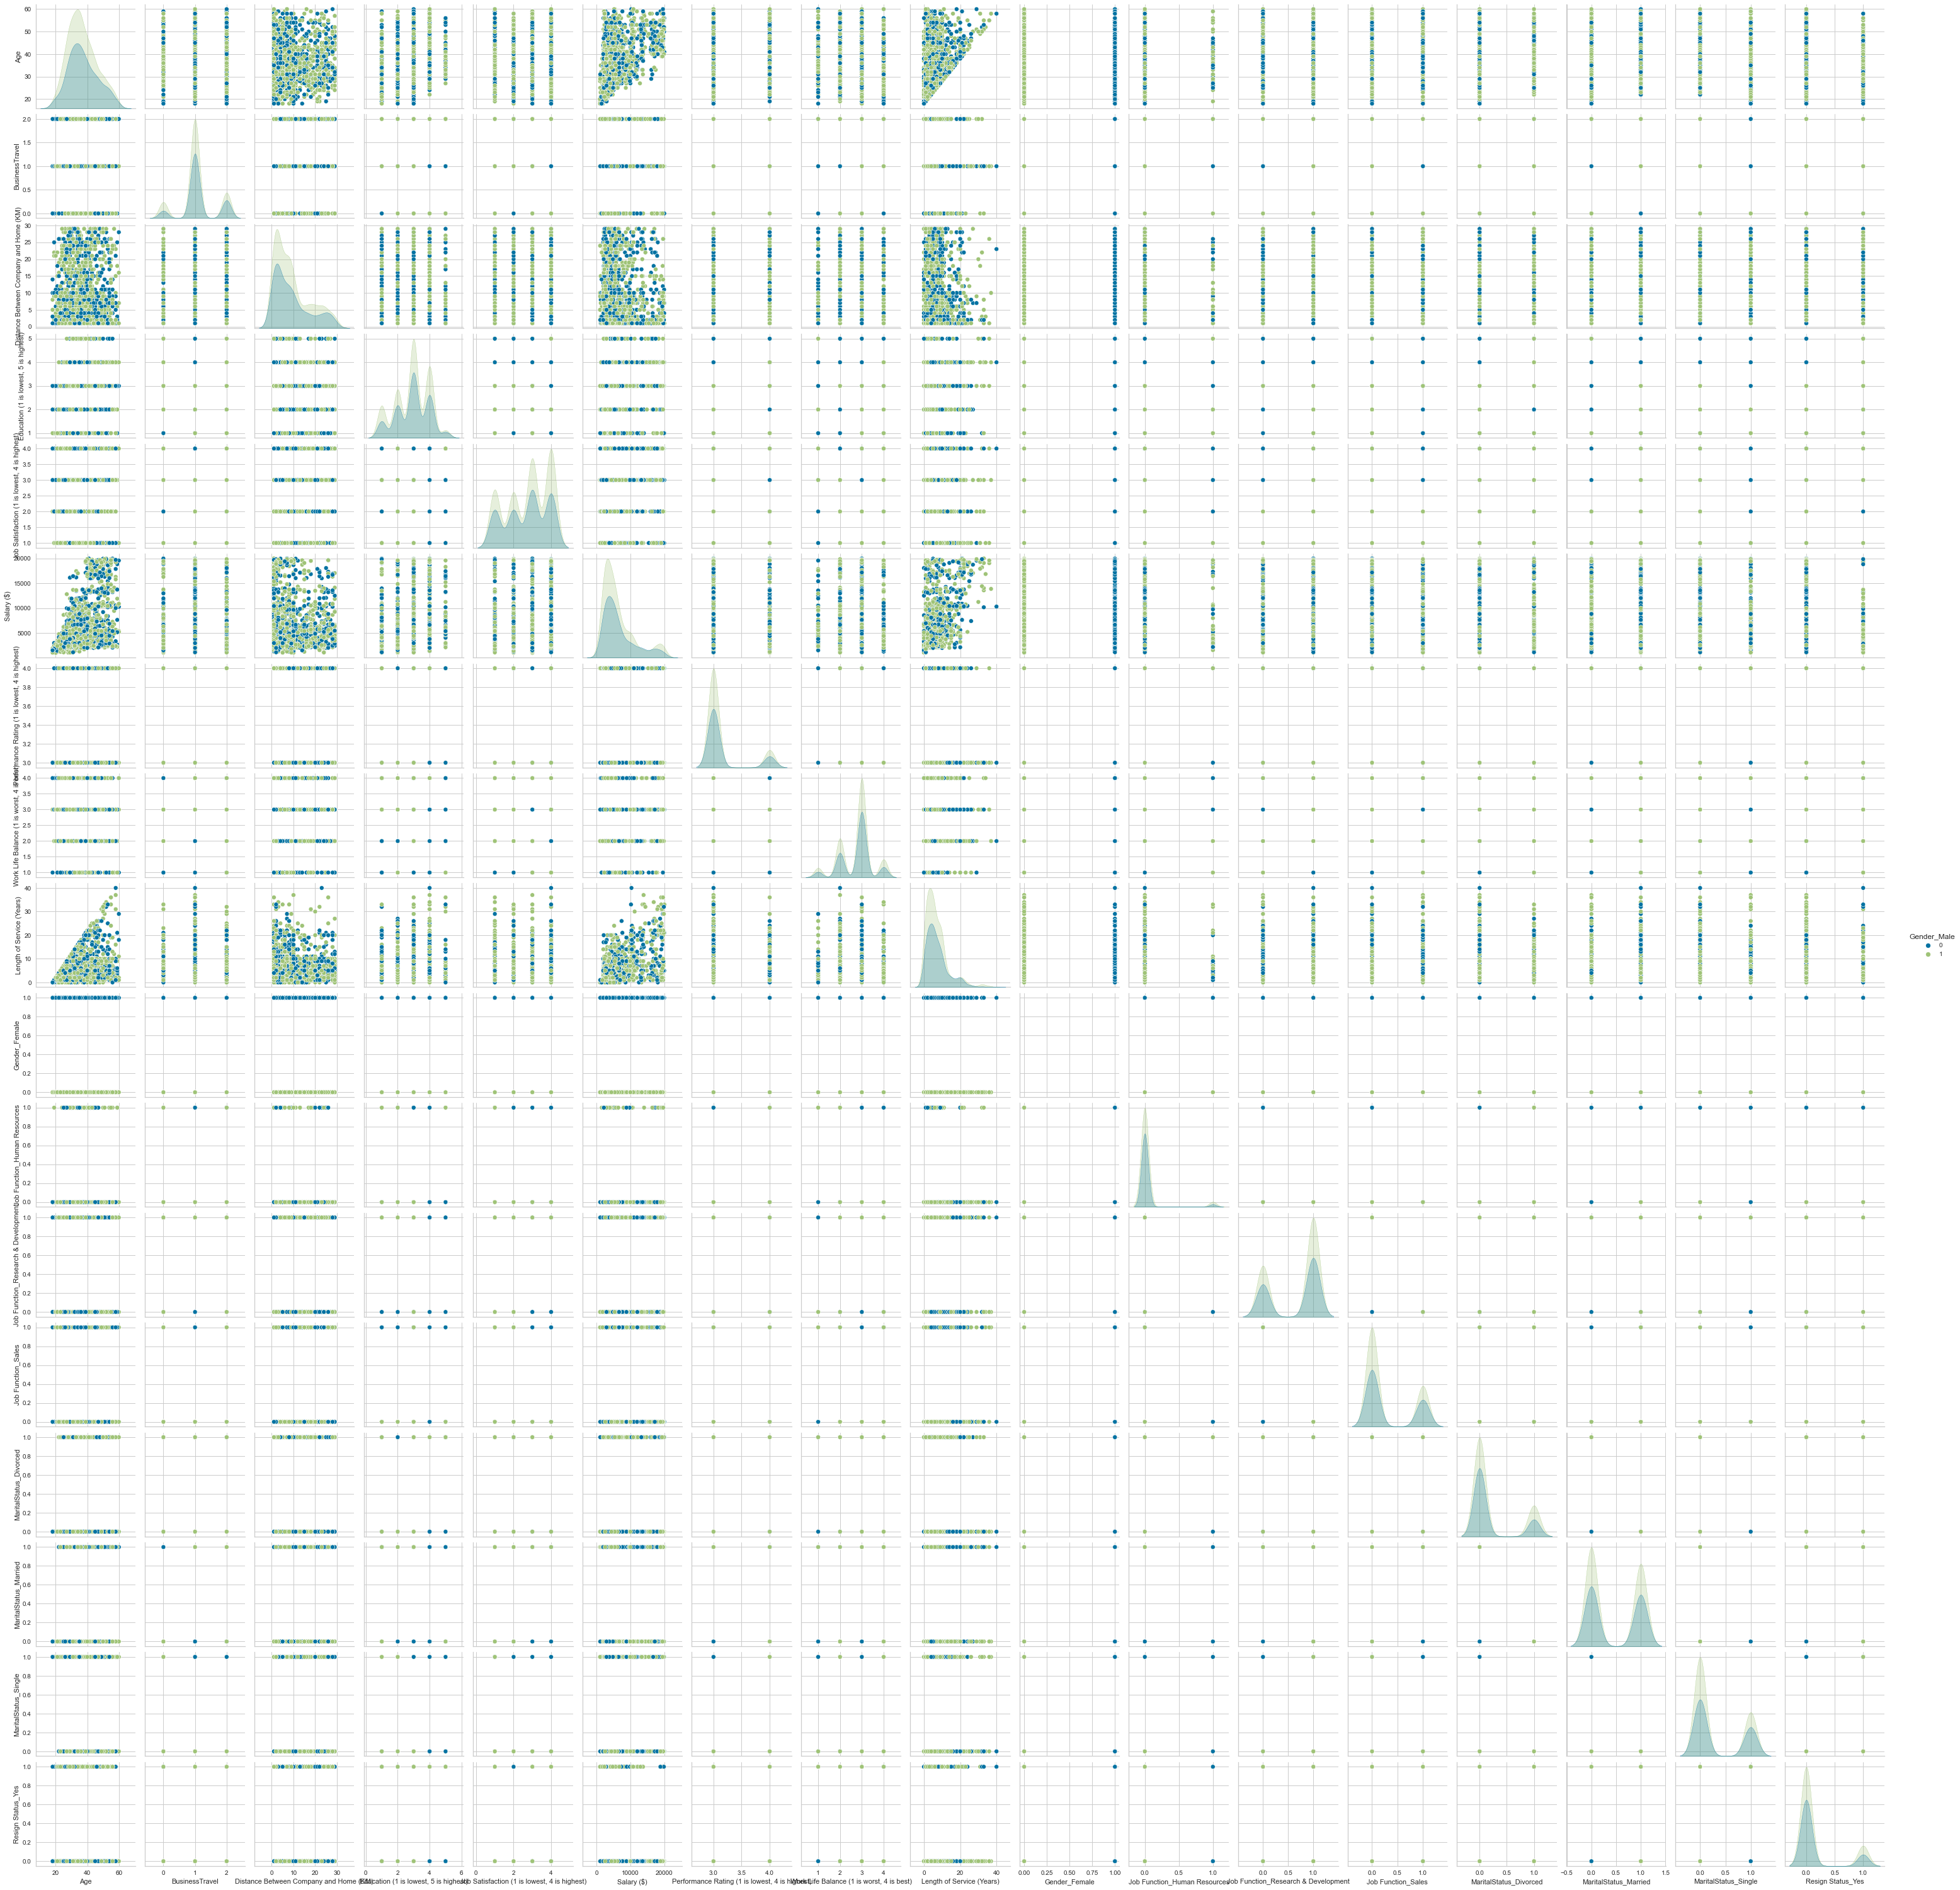

In [66]:
sns.pairplot(raw,hue='Gender_Male')
plt.show()

In [90]:
from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

X=raw.drop(['Resign Status_Yes'],axis =1)
y=raw['Resign Status_Yes']

chi_scores = chi2(X,y)
chi_scores
# first array represents chi square values
# second array represents p-values

#null hypothesis attribute is independent
#alternate hypothesis is attribute is not independent

#element 1 and element 2 of p-values is high , it is independent and does not contribute 
#much to our model.

(array([8.41552768e+01, 6.17712866e+00, 6.37721416e+01, 5.20642224e-01,
        7.01194663e+00, 1.27922294e+05, 5.06064443e-04, 1.08554296e+00,
        1.42100054e+02, 7.65129816e-01, 5.10086544e-01, 3.98626382e-01,
        3.70291570e+00, 6.69446524e+00, 8.79442184e+00, 6.59758576e+00,
        3.07716690e+01]),
 array([4.57401507e-20, 1.29412119e-02, 1.39674848e-15, 4.70567856e-01,
        8.09675971e-03, 0.00000000e+00, 9.82052402e-01, 2.97460858e-01,
        9.24706566e-33, 3.81727912e-01, 4.75101394e-01, 5.27799504e-01,
        5.43174721e-02, 9.67126726e-03, 3.02152987e-03, 1.02117140e-02,
        2.90244568e-08]))

#### null hypothesis: attribute is independent  
alternate hypothesis: attribute is not independent

#### If p-values is high aka >0.05 , it is independent and does not contribute much to our model. 

<AxesSubplot:>

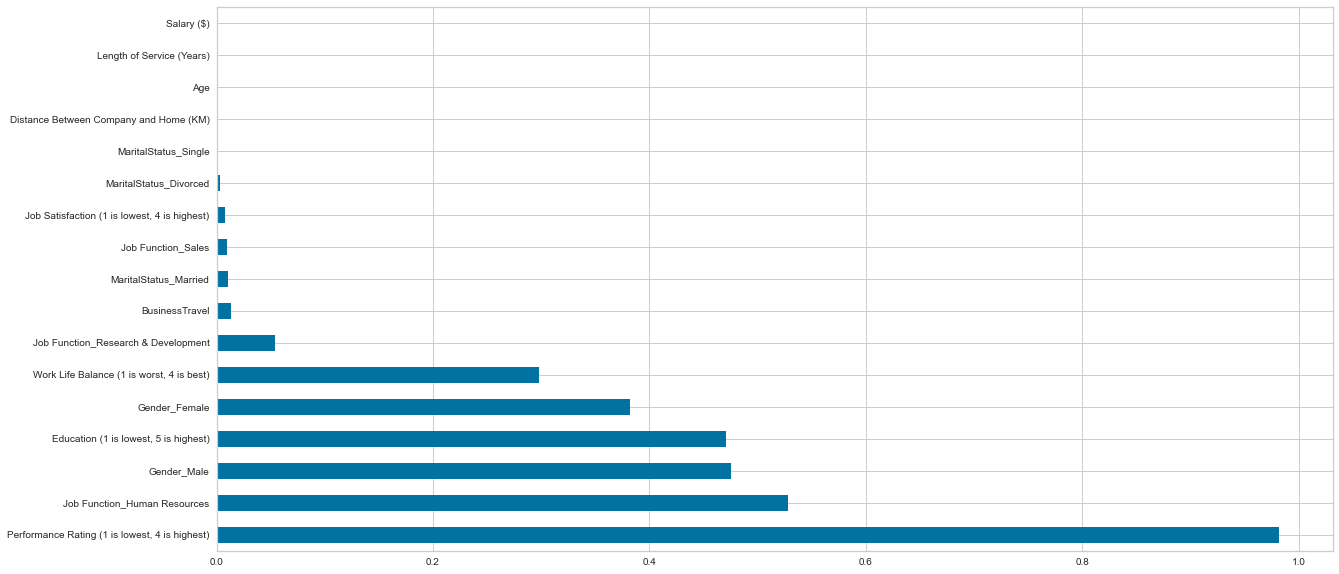

In [91]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.barh(figsize = (20,10))

### Anova test for both categorical and numerical data
If p-values are less than .05, this means that this factors have a statistically significant effect on resignation.
Those marked red should be dropped since p-value is above 0.05 and is not statistically significant.

In [69]:
#performing 2 way Anova 
df_noscale.rename(columns={"Resign Status_Yes": "ResignStatus","Job Function_Human Resources":"Job_HR","Job Function_Research & Development": "Job_RnD","Job Function_Sales":"Job_Sales"},inplace=True)  #renaming the column name
df = pd.concat([num_scaled,df_noscale],axis=1)
model = ols('ResignStatus ~ DistanceCompanyHome + MaritalStatus_Married + MaritalStatus_Single + MaritalStatus_Divorced + Education + Job_Satis + PerformRating + WorkLifeBalance + Gender_Female + Gender_Male + BusinessTravel + Job_HR + Job_RnD + Job_Sales + Age + LengthofService + Salary' ,data=df).fit()
anova=sm.stats.anova_lm(model, typ=1).sort_values('PR(>F)',ascending=False).round(10).style.bar(subset=["PR(>F)"],color ='red')
anova.bar(subset=["F"],color ='green')

,df,sum_sq,mean_sq,F,PR(>F)
Gender_Male,1.000000,0.023707,0.023707,0.194094,0.659597
MaritalStatus_Divorced,1.000000,0.042682,0.042682,0.349436,0.554524
PerformRating,2.000000,0.210476,0.105238,0.861588,0.422706
Job_HR,1.000000,0.142178,0.142178,1.164015,0.280813
Job_Sales,1.000000,0.304927,0.304927,2.496448,0.114321
Gender_Female,1.000000,0.328333,0.328333,2.688072,0.101318
WorkLifeBalance,2.000000,0.808033,0.404016,3.307696,0.036876
Salary,1.000000,0.618856,0.618856,5.066590,0.024540
Education,2.000000,1.273370,0.636685,5.212562,0.005550
DistanceCompanyHome,1.000000,1.207068,1.207068,9.882309,0.001702


# Sequential forward selections helps to select the amount of features I should roughly keep and below shows that i should keep around 6  
however the following tests only measures performance to predict resignation it does not necessarily mean that it will help with segmentation

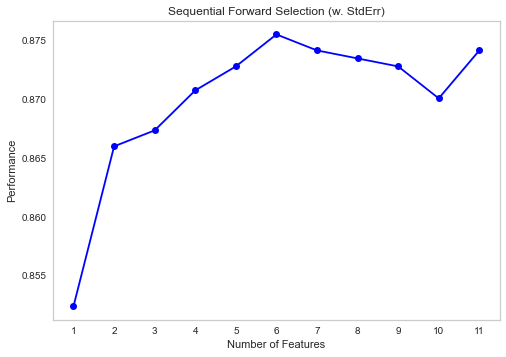

In [70]:
dataframe_scaled = pd.concat([dummy,num_scaled],axis=1)
X= dataframe_scaled.drop(['Resign Status_Yes'],axis =1)
warnings.filterwarnings('ignore')
sfs1 = SFS(KNN(),
         k_features=(3,11),
         forward=True,
         floating=False,
         cv=0)
sfs1.fit(X, y)
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

In [71]:
warnings.filterwarnings('ignore')
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features
df_X = dataframe_scaled.drop(['Resign Status_Yes'],axis =1)
df_y = dataframe_scaled['Resign Status_Yes']
print('best features based on sequential forward selection',forward_selection(df_X,df_y))

best features based on sequential forward selection ['MaritalStatus_Single', 'Salary', 'BusinessTravel', 'JobSatis', 'Job Function_Research & Development', 'DistanceCompanyHome', 'Age', 'WorkLifeBalance']


best features based on sequential forward selection ['MaritalStatus_Single', 'Salary', 'Job_Satis', 'BusinessTravel_Travel_Frequently', 'Job Function_Research & Development', 'Distance_Company_Home_KM', 'Age', 'WorkLifeBalance']

Chi-Square unimportant columns : PerformRating, Job_HR, Gender_Male,Education, Gender_Female and BusinessTravel_Travel_Rarely,WorkLifeBalance

Anova columns that are statistically insignificant: PerformRating, MaritalStatus_Divorced, Job_Sales, Education, JobHR,BusinessFrequentlyTravel,Gender_Female


Conclusion on columns to drop: 
- PerformRating
- Gender_Female (also only need Gender_Male)
- JobHR
- Education
- MaritalStatus_Divorced 
- MaritalStatus_Married (don't think theres much difference but mainly whether the person is single or not)

columns that still need further consideration: 
- Gender_Male
- Job Function




![KNN](./KNN.png)
## though KNN can handle binary data but we should still keep binary data to a minimum as shown above, models like KMeans give heavy weight/ separation to binary data

### Continuous Data appeal better to clustering models like KMeans using euclidean distance. 


## I will thus be performing more analysis to determine which categorical variables to keep as It would really be too difficult to find clusters with too many categorical

## Univariate analysis 
### I will be firstly testing on Gender , Age and Salary to see if there is a huge difference by performing sample t-test

### null hypothesis (H0) there is no statiscal significance between the gender and should be dropped
### alternate hypothesis (H1) there is no statistical significance between the gender and will help us with clustering


In [72]:
reduced_scaled =dataframe_scaled.drop(['MaritalStatus_Married','PerformRating','Gender_Female','Job Function_Sales','Job Function_Human Resources','Education','MaritalStatus_Divorced'],axis=1)
reduced_scaled

,Gender_Male,Job Function_Research & Development,MaritalStatus_Single,Resign Status_Yes,Age,BusinessTravel,DistanceCompanyHome,JobSatis,Salary,WorkLifeBalance,LengthofService
0,0,0,1,1,0.446350,-0.162399,-1.010909,1.153254,-0.108350,-2.493820,-0.164613
1,1,1,0,0,1.322365,1.717339,-0.147150,-0.660853,-0.291719,0.338096,0.488508
2,1,1,1,1,0.008343,-0.162399,-0.887515,0.246200,-0.937654,0.338096,-1.144294
3,0,1,0,0,-0.429664,1.717339,-0.764121,0.246200,-0.763634,0.338096,0.161947
4,1,1,0,0,-1.086676,-0.162399,-0.887515,-0.660853,-0.644858,0.338096,-0.817734
...,...,...,...,...,...,...,...,...,...,...,...
1465,1,1,0,0,-0.101159,1.717339,1.703764,1.153254,-0.835451,0.338096,-0.327893
1466,1,1,0,0,0.227347,-0.162399,-0.393938,-1.567907,0.741140,0.338096,-0.001333
1467,1,1,0,0,-1.086676,-0.162399,-0.640727,-0.660853,-0.076690,0.338096,-0.164613
1468,1,0,0,0,1.322365,1.717339,-0.887515,-0.660853,-0.236474,-1.077862,0.325228


In [73]:
# pip install researchpy

In [74]:
import pandas as pd
import researchpy as rp
import scipy.stats as stats
rp.ttest(group1= reduced_scaled['Salary'][reduced_scaled['Gender_Male'] == 1], group1_name= "Male",
         group2= reduced_scaled['Salary'][reduced_scaled['Gender_Male'] == 0], group2_name= "Female")

(   Variable       N          Mean        SD        SE  95% Conf.  Interval
 0      Male   882.0 -2.601235e-02  1.001806  0.033733  -0.092218  0.040193
 1    Female   588.0  3.901852e-02  0.997717  0.041145  -0.041791  0.119828
 2  combined  1470.0 -4.742994e-17  1.000340  0.026091  -0.051179  0.051179,
               Independent t-test    results
 0  Difference (Male - Female) =     -0.0650
 1          Degrees of freedom =   1468.0000
 2                           t =     -1.2213
 3       Two side test p value =      0.2222
 4      Difference < 0 p value =      0.1111
 5      Difference > 0 p value =      0.8889
 6                   Cohen's d =     -0.0650
 7                   Hedge's g =     -0.0650
 8               Glass's delta =     -0.0649
 9                 Pearson's r =      0.0319)

In [75]:
summary, results = rp.ttest(group1= reduced_scaled['Salary'][reduced_scaled['Gender_Male'] == 1], group1_name= "Male",
                            group2= reduced_scaled['Salary'][reduced_scaled['Gender_Male'] == 0], group2_name= "Female")
print(summary)

   Variable       N          Mean        SD        SE  95% Conf.  Interval
0      Male   882.0 -2.601235e-02  1.001806  0.033733  -0.092218  0.040193
1    Female   588.0  3.901852e-02  0.997717  0.041145  -0.041791  0.119828
2  combined  1470.0 -4.742994e-17  1.000340  0.026091  -0.051179  0.051179


In [76]:
reduced_scaled = reduced_scaled.drop(['Gender_Male'],axis=1)
reduced_scaled

,Job Function_Research & Development,MaritalStatus_Single,Resign Status_Yes,Age,BusinessTravel,DistanceCompanyHome,JobSatis,Salary,WorkLifeBalance,LengthofService
0,0,1,1,0.446350,-0.162399,-1.010909,1.153254,-0.108350,-2.493820,-0.164613
1,1,0,0,1.322365,1.717339,-0.147150,-0.660853,-0.291719,0.338096,0.488508
2,1,1,1,0.008343,-0.162399,-0.887515,0.246200,-0.937654,0.338096,-1.144294
3,1,0,0,-0.429664,1.717339,-0.764121,0.246200,-0.763634,0.338096,0.161947
4,1,0,0,-1.086676,-0.162399,-0.887515,-0.660853,-0.644858,0.338096,-0.817734
...,...,...,...,...,...,...,...,...,...,...
1465,1,0,0,-0.101159,1.717339,1.703764,1.153254,-0.835451,0.338096,-0.327893
1466,1,0,0,0.227347,-0.162399,-0.393938,-1.567907,0.741140,0.338096,-0.001333
1467,1,0,0,-1.086676,-0.162399,-0.640727,-0.660853,-0.076690,0.338096,-0.164613
1468,0,0,0,1.322365,1.717339,-0.887515,-0.660853,-0.236474,-1.077862,0.325228


In [77]:
reduced_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Job Function_Research & Development  1470 non-null   uint8  
 1   MaritalStatus_Single                 1470 non-null   uint8  
 2   Resign Status_Yes                    1470 non-null   uint8  
 3   Age                                  1470 non-null   float64
 4   BusinessTravel                       1470 non-null   float64
 5   DistanceCompanyHome                  1470 non-null   float64
 6   JobSatis                             1470 non-null   float64
 7   Salary                               1470 non-null   float64
 8   WorkLifeBalance                      1470 non-null   float64
 9   LengthofService                      1470 non-null   float64
dtypes: float64(7), uint8(3)
memory usage: 84.8 KB


## Conclusion : I should drop the gender column since there is not much difference in the pay which is what I think would affect the clusters and resignation

# Before applying models will do a hopkins statistic check if data has clustering tendency 
Null hypothesis(H0) : Data points are generated by uniform distribution (implying no meaningful clusters)
Alternate hypothesis(H1) : Data points are generated by random data points(presence of clusters)

If H>0.5 null hypothesis can be rejected as it is very much likely that data contains clusters

In [78]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
# function to compute hopkins's statistic for the dataframe X
def hopkins_statistic(X):
    
    X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0]*0.05) #0.05 (5%) based on paper by Lawson and Jures
    
    
    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))
    
    
    
    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]
   
    
    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)
    
    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour
    
    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]
    
 
    
    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)
    
    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H
hopkins_statistic(reduced_scaled)

0.6644329514513596

# Visualing on 2d plot

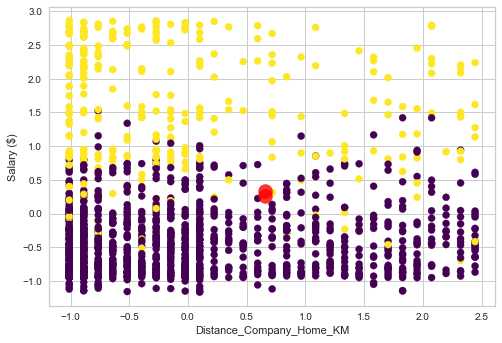

In [79]:
# K-means Clustering
from functools import reduce
from sklearn.cluster import KMeans
import pandas as pd
# fit a Kmeans model to the data
model = KMeans(n_clusters=2)
model.fit(reduced_scaled)
# Visualize the results
import matplotlib.pyplot as plt
y_kmeans = model.predict(reduced_scaled)
# scatter plot the sepal length versus sepal width
plt.scatter(reduced_scaled['DistanceCompanyHome'], reduced_scaled['Salary'], c=y_kmeans, s=50, cmap='viridis')
# plot centroids for each cluster
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.8)
plt.xlabel('Distance_Company_Home_KM')
plt.ylabel('Salary ($)')
plt.show()


In [80]:
# Clustering silhouette_score
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
# trying different number of clusters


X = reduced_scaled.drop(['Resign Status_Yes'],axis =1)
for k in range(2, 11):
    model = KMeans(n_clusters=k).fit(dataframe_scaled)
    label = model.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {:.3f}".format(k,
    sil_coeff))


For n_clusters=2, The Silhouette Coefficient is 0.223
For n_clusters=3, The Silhouette Coefficient is 0.051
For n_clusters=4, The Silhouette Coefficient is 0.083
For n_clusters=5, The Silhouette Coefficient is 0.047
For n_clusters=6, The Silhouette Coefficient is 0.052
For n_clusters=7, The Silhouette Coefficient is 0.062
For n_clusters=8, The Silhouette Coefficient is 0.065
For n_clusters=9, The Silhouette Coefficient is 0.060
For n_clusters=10, The Silhouette Coefficient is 0.059


In [81]:
# pip install yellowbrick

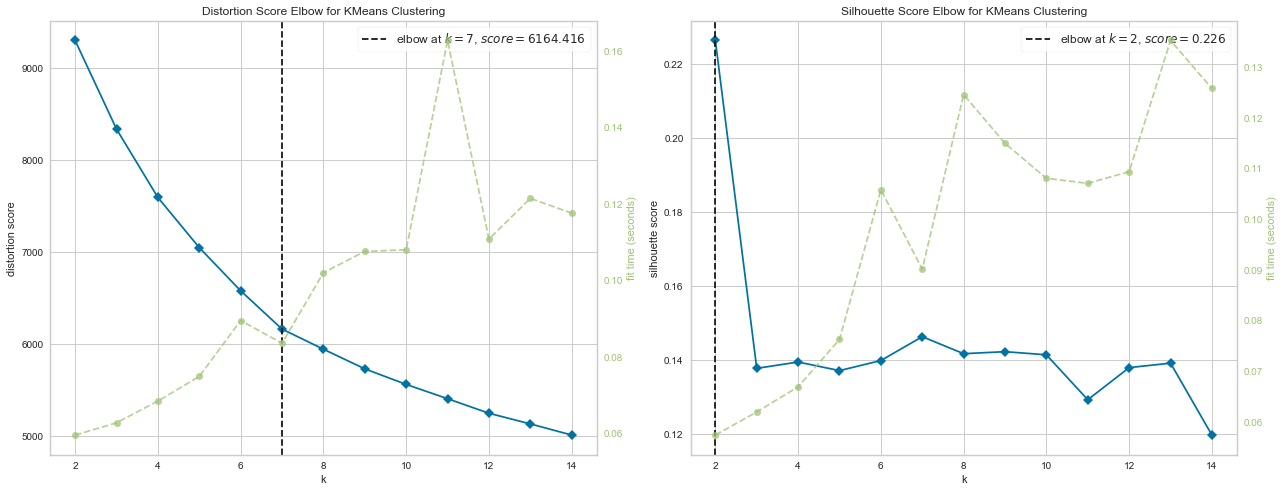

In [82]:
from yellowbrick.cluster import KElbowVisualizer
fig, ax = plt.subplots(1, 2, tight_layout=True)

fig.set_size_inches(18, 7)

n_range = np.arange(2, 15)

kmean =  KMeans(init='k-means++', max_iter=500, algorithm = "elkan", random_state=0).fit(reduced_scaled)
# k mean with distortion as metric
elbow_inertia = KElbowVisualizer(kmean, k=n_range, metric='distortion', ax=ax[0])
elbow_inertia.fit(reduced_scaled)
elbow_inertia.finalize()

# k mean with silhouette as metric
elbow_silhouette = KElbowVisualizer(kmean, k=n_range, metric='silhouette', ax=ax[1])
elbow_silhouette.fit(reduced_scaled)
elbow_silhouette.finalize()

plt.show()

### Visualizing 3d with no predictions

In [99]:
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px

# set to offline mode to avoid any error
init_notebook_mode(connected=True)

# 3D Scatter Plot
data = px.scatter_3d(reduced_scaled, x='Age', y='Salary', z='DistanceCompanyHome', opacity=.7, size_max=15,color='Job Function_Research & Development',symbol='MaritalStatus_Single')

data.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
), margin=dict(l=0, r=0, b=0, t=0))

# embedding into the notebook
iplot({'data': data})


## Using PCA for better visualization of data with clusters of 2

In [113]:

# PCA Analysis on reduced_scaled
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(reduced_scaled)
pca_3d = pca.transform(reduced_scaled)
pca_3d = pd.DataFrame(pca_3d,columns=['PC1','PC2','PC3'])

from sklearn.cluster import KMeans

km = KMeans(n_clusters=2, random_state=1)
new = pca_3d._get_numeric_data().dropna(axis=1)
km.fit(pca_3d)
predict=km.predict(pca_3d)

pca_3d['cluster']=predict

# set to offline mode to avoid any error
init_notebook_mode(connected=True)

# 3D Scatter Plot
data = px.scatter_3d(pca_3d, x='PC1', y='PC2', z='PC3', opacity=.7, size_max=15,color='cluster')

data.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
), margin=dict(l=0, r=0, b=0, t=0))

# embedding into the notebook
iplot({'data': data})



## Using PCA for better visualization of data with clusters of 7

In [114]:
reduced_scaled
# PCA Analysis on reduced_scaled
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(reduced_scaled)
pca_3d = pca.transform(reduced_scaled)
pca_3d = pd.DataFrame(pca_3d,columns=['PC1','PC2','PC3'])

from sklearn.cluster import KMeans

km = KMeans(n_clusters=7, random_state=1)
new = pca_3d._get_numeric_data().dropna(axis=1)
km.fit(pca_3d)
predict=km.predict(pca_3d)

pca_3d['cluster']=predict

# set to offline mode to avoid any error
init_notebook_mode(connected=True)

# 3D Scatter Plot
data = px.scatter_3d(pca_3d, x='PC1', y='PC2', z='PC3', opacity=.7, size_max=15,color='cluster')

data.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
), margin=dict(l=0, r=0, b=0, t=0))

# embedding into the notebook
iplot({'data': data})

In [84]:
from sklearn.manifold import TSNE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# t-dsitrbuted stochastic neighbor embedding
tsne = TSNE(n_components=2, learning_rate=250, random_state=0, n_jobs=4)

# using dimension reduction tool to visualise the dataset on a 2-Dimension plane
eda_tsne = Pipeline(
    steps=[
        # ('Standardisation', StandardScaler()),
        ('TSNE', tsne)
    ]
)

# storing embedding as a DataFrame
embedded_2d = pd.DataFrame(eda_tsne.fit_transform(reduced_scaled), columns=['Component 1', 'Component 2'], index=reduced_scaled.index)

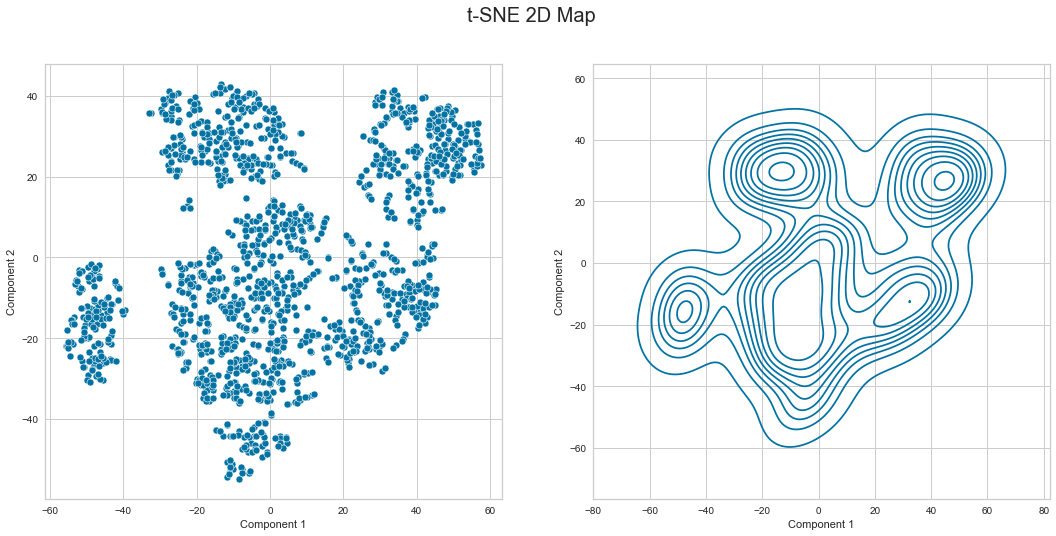

In [85]:
# t-SNE 2D map
fig, ax = plt.subplots(1, 2, figsize=(18, 8))
sns.scatterplot(data=embedded_2d, x='Component 1', y='Component 2', ax=ax[0])
sns.kdeplot(data=embedded_2d, x='Component 1', y='Component 2', ax=ax[1])
fig.suptitle('t-SNE 2D Map', fontsize=20)
plt.show()

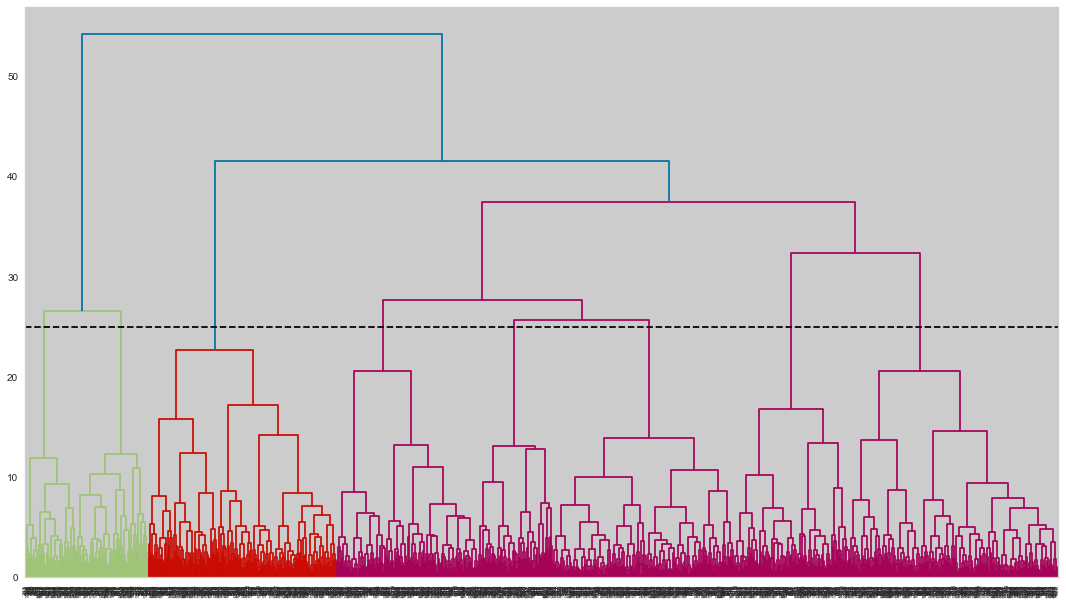

In [116]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram

fig = plt.gcf()
# Calculate the linkage: mergings
mergings = linkage(reduced_scaled,method='ward')


# Plot the dendrogram
dendrogram(mergings,
           leaf_rotation=90,
           leaf_font_size=6,
           p = 6
)


fig.set_size_inches(18.5, 10.5)
plt.axhline(linestyle='--', y=25, color='black')
plt.show()
